# Categorising the IMDB rating into 2 classes Hit vs Avg


# 1 INTRODUCTION

movie_metadata.csv is taken from Kaggle in which the target variable is IMDB score and other variables that decide the IMDB score. Instead of just IMDB score,With the help of other parameters we predict whether a movie is Hit,Avg or Flop.



|imdb_score | Classify |
| --- | ---|
|1-6 | Average Movie|
|6-10 | Hit Movie|


|Variable Name |	Description|
| --- | --- |
|movie_title	 | Title of the Movie|
|duration	| Duration in minutes|
|director_name	| Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name |	Other actor starring in the movie|
|actor_2_facebook_likes	| Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users | 	Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|plot_keywords |	Keywords describing the movie plot|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color |	Film colorization. ‘Black and White’ or ‘Color’|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|
|title_year |	The year in which the movie is released (1916:2016)|
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|movie_imdb_link |	IMDB link of the movie|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|

Lets see which features influence the target varible(IMDB Score)

# 2 DATA EXPLORATION

## 2.1 Importing necessary Libraries


In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn   
from sklearn.model_selection import StratifiedGroupKFold      

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install flaml


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Reading the dataset
data=pd.read_csv('movie_metadata.csv')
data.head()
# len(data)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2.2 Categorizing the target varible 

Here we are categorizing the target variable in such a way that IMDB score between 1 and 3 is FLOP , between 3 and 6 is AVG, between 6 and 10 is HIT.

And we are using binning in pandas to acheive this.


In [5]:
#Categorising the target varible 
bins = [ 1, 6, 10]
labels = ['NOT_HIT', 'HIT'] #'NOT_HIT', 'HIT'
data['imdb_binned'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)

 Barplot of imbd_binned column

Text(0.5, 1.0, 'Categorization of Movies')

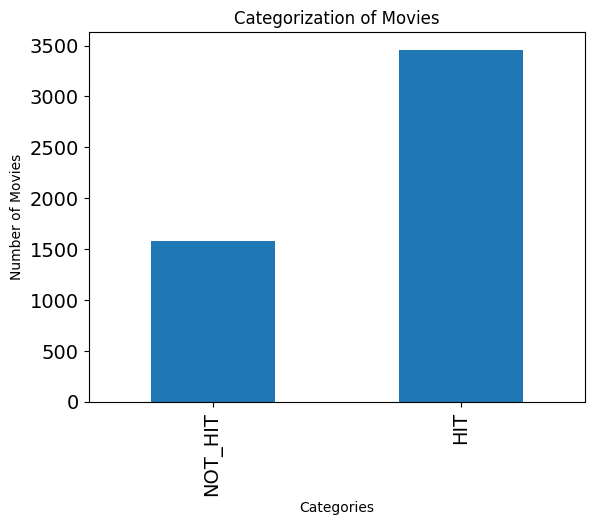

In [6]:
data.groupby(['imdb_binned']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

We can see a new column named imdb_binned correctly categorising the imdb score


In [7]:
#Checking the new column
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,HIT
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,HIT
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,HIT


Our dataset contains 5043 samples(rows) and 28 variables(columns)

In [8]:
#Shape of the dataset
data.shape

(5043, 29)

## 2.3 Handling the Missing values

Every datset have some missing values, lets find out in which cloumns they are?

In [9]:
#Total null values present in each column
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
imdb_binned                    0
dtype: int64

Dropping all the samples that having missing values


In [10]:
#Droping the samples that have missing values
data.dropna(inplace=True)

Total samples remaining after dropping missing values


In [11]:
#Final shape of the data after Droping missing values
data.shape

(3756, 29)

In [12]:
#List of variables in the datset
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'imdb_binned'],
      dtype='object')

In [13]:
data.shape

(3756, 29)

Lets find out how the string variables are behaving

In [14]:
#Describing the categorical data
data.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756
unique,2,1659,2188,745,1428,3655,2587,3656,3656,34,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Home,Steve Coogan,alien friendship|alien invasion|australia|flyi...,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,English,USA,R
freq,3632,25,20,147,42,3,8,3,3,3598,2987,1700


'movie_title','movie_imdb_link' columns are almost unique,so they doesn't contribute in predicting target variable

In [15]:
#Dropping 2 columns
data.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

## 2.4 Label Encoding

All the categorical columns and the columns with text data are being Label Encodeded in this step.

In [16]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [17]:
#A sample of data after label encoding
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,1,620,723.0,178.0,0.0,855.0,1002,1000.0,760505847.0,91,...,9,43,7,237000000.0,66,936.0,7.9,7,33000,HIT
1,1,538,302.0,169.0,563.0,1000.0,1592,40000.0,309404152.0,85,...,9,43,7,300000000.0,64,5000.0,7.1,12,0,HIT
2,1,1395,602.0,148.0,0.0,161.0,1795,11000.0,200074175.0,107,...,9,42,7,245000000.0,72,393.0,6.8,12,85000,HIT
3,1,251,813.0,164.0,22000.0,23000.0,381,27000.0,448130642.0,243,...,9,43,7,250000000.0,69,23000.0,8.5,12,164000,HIT
5,1,62,462.0,132.0,475.0,530.0,1837,640.0,73058679.0,105,...,9,43,7,263700000.0,69,632.0,6.6,12,24000,HIT


## 2.5 Correlation

To find out whether there is any relation between variables, in other terms multicollineariaty.



<Axes: >

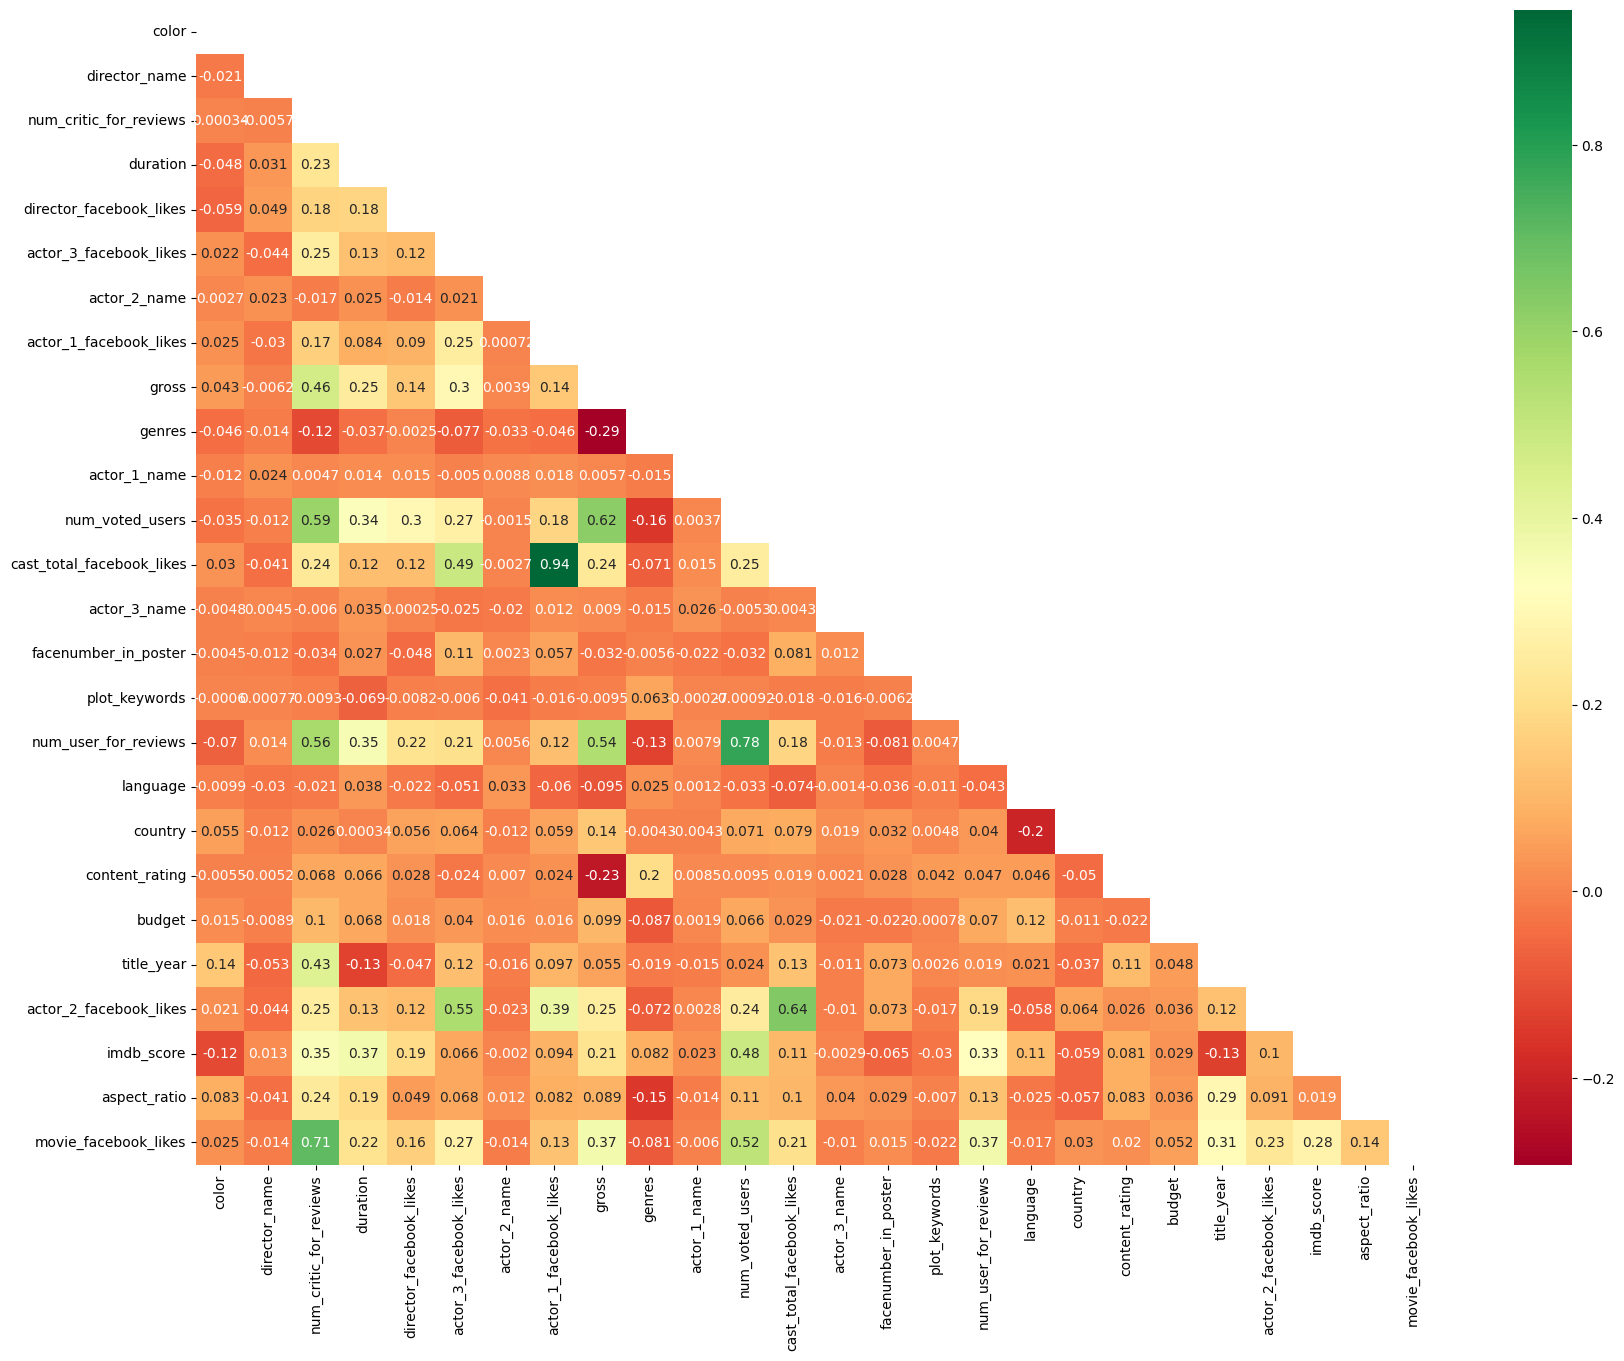

In [18]:
#Finding Correlation between variables
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

These variables that are correlated cause errors in the prediction, so removing them


In [19]:
#Removing few columns due to multicollinearity
data.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews'],inplace=True)

Removing the column "imdb_score" since we have "imdb_binned

I am gonna train the model with imdb_binned not with imdb_score so dropping the column.


In [20]:
#Removing the column "imdb_score" since we have "imdb_binned"
data.drop(columns=['imdb_score'],inplace=True)

In [21]:
data.shape

(3756, 24)

# 3 CLASSIFICATION MODEL BUILDING

Splitting the data into X and y where X contains Indepentent variables and y contain Target/Dependent variable.


In [22]:
#Independent Variables
X = data.iloc[:, 0:23].values
#Dependent/Target Variable
y = data.iloc[:, 23].values
y

['HIT', 'HIT', 'HIT', 'HIT', 'HIT', ..., 'HIT', 'HIT', 'HIT', 'HIT', 'HIT']
Length: 3756
Categories (2, object): ['NOT_HIT' < 'HIT']

## 3.1 Train Test Split

We need data not only to train our model but also to test our model. So splitting the dataset into 70:30 (Train:Test) ratio.We have a predefined a function in Sklearn library called test_train_split, lets use that.

In [23]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify = y)
print(X_train.shape)
print(y_train.shape)

y_train = np.array(y_train)
y_test = np.array(y_test)

(2629, 23)
(2629,)


## 3.2 Scaling

Few variables will be in the range of Millions and some in Tens, lets bring all of them into same scale


In [24]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4. FLAML

In the FLAML automl run configuration, users can specify the task type, time budget, error metric, learner list, whether to subsample, resampling strategy type, and so on. All these arguments have default values which will be used if users do not provide them. For example, the default classifiers are ['lgbm', 'xgboost', 'xgb_limitdepth', 'catboost', 'rf', 'extra_tree', 'lrl1'].

## 4.1 Running FLAML

In [25]:
''' import AutoML class from flaml package '''
from flaml import AutoML
automl = AutoML()

In [26]:
settings = {
    "time_budget": 5,  # total running time in seconds
    "metric": 'accuracy', 
                        # check the documentation for options of metrics (https://microsoft.github.io/FLAML/docs/Use-Cases/Task-Oriented-AutoML#optimization-metric)
    "task": 'classification',  # task type
    "log_file_name": 'movies_experiment.log',  # flaml log file
    "seed": 7654321,    # random seed
}

In [27]:
'''The main flaml automl API'''
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.automl: 04-03 06:02:22] {2726} INFO - task = classification
[flaml.automl.automl: 04-03 06:02:22] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 04-03 06:02:22] {2731} INFO - Evaluation method: holdout
[flaml.automl.automl: 04-03 06:02:22] {2858} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 04-03 06:02:22] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 04-03 06:02:22] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-03 06:02:23] {3472} INFO - Estimated sufficient time budget=2257s. Estimated necessary time budget=52s.
[flaml.automl.automl: 04-03 06:02:23] {3519} INFO -  at 0.3s,	estimator lgbm's best error=0.3057,	best estimator lgbm's best error=0.3057
[flaml.automl.automl: 04-03 06:02:23] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-03 06:02:23] {3519} INFO -  at 0.4s,	estimator lgbm's best e

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 04-03 06:02:24] {3519} INFO -  at 1.3s,	estimator xgboost's best error=0.2717,	best estimator lgbm's best error=0.2189
[flaml.automl.automl: 04-03 06:02:24] {3334} INFO - iteration 4, current learner lgbm
[flaml.automl.automl: 04-03 06:02:25] {3519} INFO -  at 2.3s,	estimator lgbm's best error=0.1887,	best estimator lgbm's best error=0.1887
[flaml.automl.automl: 04-03 06:02:25] {3334} INFO - iteration 5, current learner xgboost
[flaml.automl.automl: 04-03 06:02:25] {3519} INFO -  at 2.4s,	estimator xgboost's best error=0.2717,	best estimator lgbm's best error=0.1887
[flaml.automl.automl: 04-03 06:02:25] {3334} INFO - iteration 6, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 04-03 06:02:26] {3519} INFO -  at 4.0s,	estimator lgbm's best error=0.1774,	best estimator lgbm's best error=0.1774
[flaml.automl.automl: 04-03 06:02:26] {3334} INFO - iteration 7, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 04-03 06:02:27] {3519} INFO -  at 4.3s,	estimator xgboost's best error=0.2377,	best estimator lgbm's best error=0.1774
[flaml.automl.automl: 04-03 06:02:27] {3334} INFO - iteration 8, current learner extra_tree
[flaml.automl.automl: 04-03 06:02:27] {3519} INFO -  at 4.4s,	estimator extra_tree's best error=0.3057,	best estimator lgbm's best error=0.1774
[flaml.automl.automl: 04-03 06:02:27] {3334} INFO - iteration 9, current learner extra_tree
[flaml.automl.automl: 04-03 06:02:27] {3519} INFO -  at 4.6s,	estimator extra_tree's best error=0.3057,	best estimator lgbm's best error=0.1774
[flaml.automl.automl: 04-03 06:02:27] {3334} INFO - iteration 10, current learner extra_tree
[flaml.automl.automl: 04-03 06:02:27] {3519} INFO -  at 5.1s,	estimator extra_tree's best error=0.3057,	best estimator lgbm's best error=0.1774
[flaml.automl.automl: 04-03 06:02:29] {3783} INFO - retrain lgbm for 1.8s
[flaml.automl.automl: 04-03 06:02:29] {3790} INFO - retrained model: LGBMCla

## 4.2 Best model and metric

In [28]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 27, 'num_leaves': 46, 'min_child_samples': 12, 'learning_rate': 0.4090419554311288, 'log_max_bin': 10, 'colsample_bytree': 1.0, 'reg_alpha': 0.001238046501594789, 'reg_lambda': 0.0496268711513292}
Best accuracy on validation data: 0.8226
Training duration of best run: 1.837 s


In [29]:
automl.model.estimator

LGBMClassifier(learning_rate=0.4090419554311288, max_bin=1023,
               min_child_samples=12, n_estimators=27, num_leaves=46,
               reg_alpha=0.001238046501594789, reg_lambda=0.0496268711513292,
               verbose=-1)

In [30]:
'''pickle and save the automl object'''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
'''load pickled automl object'''
with open('automl.pkl', 'rb') as f:
    automl = pickle.load(f)

In [31]:
'''compute predictions of testing dataset''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels ['NOT_HIT' 'HIT' 'NOT_HIT' ... 'NOT_HIT' 'HIT' 'HIT']
True labels ['NOT_HIT' 'HIT' 'HIT' ... 'NOT_HIT' 'HIT' 'HIT']


In [32]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.8287488908606921
roc_auc = 0.8800751433068996
log_loss = 0.45056693112794577


## 4.3 Log history

In [33]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 2366, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 2366, 'Current Hyper-parameters': {'n_estimators': 15, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_bytree': 0.9086551727646448, 'reg_alpha': 0.0015561782752413472, 'reg_lambda': 0.33127416269768944}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 15, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_byt

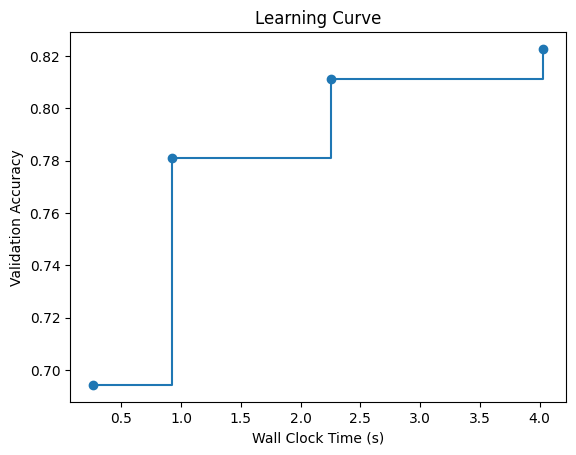

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

# REPORT

In [35]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         HIT       0.86      0.91      0.88       783
     NOT_HIT       0.75      0.65      0.70       344

    accuracy                           0.83      1127
   macro avg       0.80      0.78      0.79      1127
weighted avg       0.82      0.83      0.83      1127

